Purpose of this notebook: 
* reads and summarizes the outputs from projections and smoothing
* creates LaTeX table for the paper 


In [169]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [170]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (10, 8)

In [204]:
from __future__ import print_function
from astropy.stats import biweight_location
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
# import seaborn as sns
import compute_distance as compDist
import plot_cred_int as plotCI
import plot_gal_prop as plotgal
i
import get_KDE

In [76]:
data_path = "../../data/test_results/"

# read in files 

In [172]:
clstNo = 43
date_stamp = '06_17_16'

DM_fhats = \
    h5py.File(data_path +
              "DM_fhat_clst{0}_{1}.h5".format(
            clstNo, date_stamp), 'r')
star_fhats = \
    h5py.File(data_path +
              "stars_fhat_clst{0}_{1}.h5".format(
            clstNo, date_stamp), 'r')
main_FOF_h5 = h5py.File(
        "../../data/" +
        "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135" +
        ".hdf5", "r")

# figure out how many projections we did 

In [78]:
clstNo = [int(no) for no in star_fhats.keys()]

In [79]:
star_paths = compDist.retrieve_cluster_path(star_fhats)

the list of `DM_paths` are 

The projections do not mean a thing except for debugging purposes, 
only the `clstNo` is a valid identifier 

In [81]:
split_path = star_paths[0].split('/')

In [82]:
fixed_path = '/'.join(split_path[1:4])

In [83]:
path = '0' + '/' + fixed_path

In [84]:
projections = star_fhats[str(clstNo[0]) + '/' + fixed_path].keys()

## columns in my uber dataframe (projection independent part)
| ClstNo | $m_{200c}$ | richness | relaxedness0| relaxedness1 |  


## projection dependent part 
| ClstNo | kernel_width | $\Delta s_{BCG}$ | $\Delta s_{KDE}$ | $\zeta$ | $\Delta s_{SA}$ | $\Delta s_{C}$ |  projection | total_peaks_dens | 

ClstNo is retained to match and join the two sets of `df`

# gather the projection dependent part of the `uber_df`

In [86]:
summary_stat_keys = ['BCG', 'centroid', "shrink_cent"]

In [173]:
uber_df1 = pd.read_hdf("../../data/uber_df_06_17_16.h5", 'df')
uber_df2 = pd.read_hdf("../../data/uber_df_06_21_16.h5", 'df')

In [174]:
uber_df = pd.concat([uber_df1, uber_df2])

In [175]:
uber_df.describe()

,BCG,Delta_x_BCG,Delta_x_centroid,Delta_x_shrink_cent,Delta_y_BCG,Delta_y_centroid,Delta_y_shrink_cent,centroid,shrink_cent,peak_id,KDE,Delta_x_KDE,Delta_y_KDE,total_peaks_dens,bin_width
count,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000,81730.000000
mean,110.666876,-19.447885,-44.545810,-5.694452,38.567763,-0.084272,0.283598,299.029235,142.044516,0.216714,52.425456,-1.148062,-0.173357,1.518573,12.500000
std,375.334458,290.523352,252.330571,159.036116,258.560881,279.612415,182.128125,233.277951,195.751772,0.473781,122.578699,82.144212,104.999905,0.533250,12.500076
min,0.014623,-2335.323700,-1641.311591,-2158.514742,-2549.083087,-1256.465395,-2546.137311,1.798711,0.080020,0.000000,0.030510,-2233.201434,-2711.988769,1.000000,0.000000
25%,2.031716,-2.867421,-179.138775,-41.250903,-2.323842,-129.475343,-37.039988,137.758880,23.531404,0.000000,13.344045,-16.728238,-15.473805,1.103155,0.000000
50%,5.242475,-0.098898,-40.103645,-2.660576,0.134014,0.130068,-0.027373,225.668005,65.425178,0.000000,27.537627,-1.167423,0.023360,1.347219,12.500000
75%,10.478879,2.466934,79.886787,27.045871,3.111763,129.404552,37.207879,375.362600,192.348729,0.000000,55.430382,13.140860,15.521952,1.780384,25.000000
max,2617.341367,2476.516857,1130.917955,2463.382179,2600.273671,1100.052472,2589.655373,1949.101998,2608.523090,5.000000,3106.675160,2898.095436,3048.832855,5.325824,25.000000


# make plots

In [176]:
from pandas.tools.plotting import scatter_matrix

In [177]:
dom_peak_gpby = uber_df.groupby(['peak_id', 'bin_width'])

In [178]:
dom_peak_df = dom_peak_gpby.get_group((0, 0.0))
dom_peak_df_25 = dom_peak_gpby.get_group((0, 25.0))

In [ ]:
twoD_keys = []

In [ ]:

dom_peak_df_25.describe()[]

In [201]:
dom_peak_df.describe()

,BCG,Delta_x_BCG,Delta_x_centroid,Delta_x_shrink_cent,Delta_y_BCG,Delta_y_centroid,Delta_y_shrink_cent,centroid,shrink_cent,peak_id,KDE,Delta_x_KDE,Delta_y_KDE,total_peaks_dens,bin_width
count,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024.000000,33024,33024.000000,33024.000000,33024.000000,33024.000000,33024
mean,76.351315,-12.348375,-40.086556,-5.711648,23.360354,-0.093537,0.199073,257.645889,118.652051,0,34.402680,-1.342684,0.113763,1.375895,0
std,301.010393,230.517015,223.421493,135.695389,206.399256,242.373330,151.737361,209.488830,165.503454,0,53.495167,42.563009,47.242858,0.420166,0
min,0.014623,-2335.323700,-1641.311591,-2158.514742,-2549.083087,-1256.465395,-2546.137311,1.798711,0.137501,0,0.124962,-1361.138166,-1746.004500,1.000000,0
25%,4.393014,-4.233680,-160.417303,-36.675068,-4.197491,-109.172848,-31.060414,112.806852,21.026936,0,9.756288,-13.791219,-11.871234,1.070827,0
50%,8.101958,0.166922,-34.620209,-2.334568,0.097385,0.256336,-0.062728,198.721120,57.861096,0,21.852090,-1.145422,-0.002929,1.251899,0
75%,11.326903,4.859317,68.272205,23.483719,4.921642,109.429350,31.377601,311.502478,162.639817,0,44.576473,9.585958,11.989125,1.526079,0
max,2617.341367,2476.516857,1130.917955,2463.382179,2600.273671,1098.678067,2589.655373,1949.101998,2608.523090,0,2511.642013,1881.667880,2494.281048,5.325824,0


In [187]:
keys = ['BCG', 'shrink_cent', 'KDE']

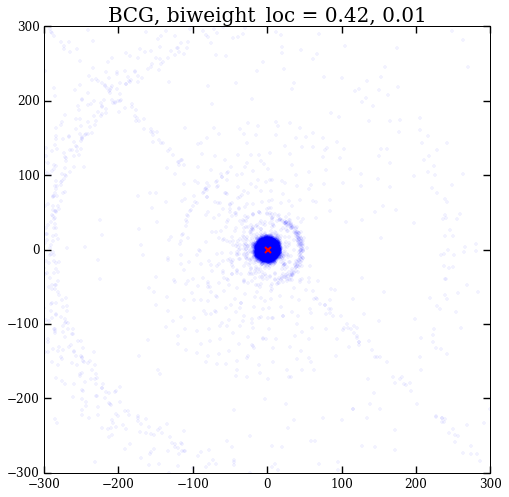

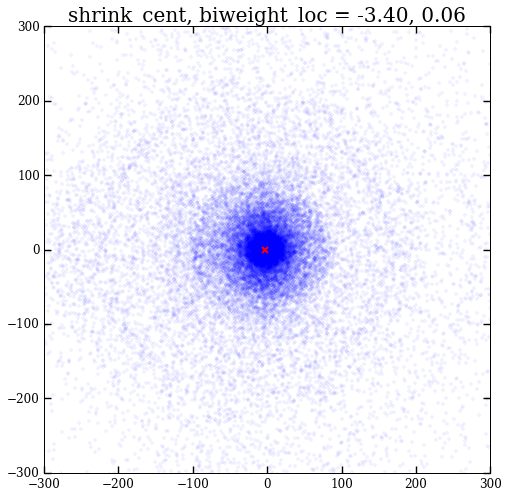

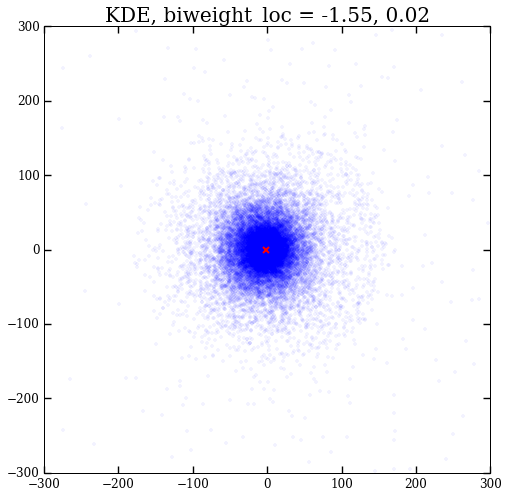

In [208]:
## This is for DOMINANT PEAKS only
for key in keys:
    plt.axes().set_aspect('equal')
    plt.plot(
        np.array(dom_peak_df['Delta_x_' + key]), 
        np.array(dom_peak_df['Delta_y_' + key]),
        'b.', alpha=0.05
        )
    biweight_loc = (biweight_location(dom_peak_df['Delta_x_' + key]), 
             biweight_location(dom_peak_df['Delta_y_' + key]))
    plt.plot(biweight_loc[0], biweight_loc[1],
             'rx', mew=2.)
    
    plt.xlim(-300, 300)
    plt.ylim(-300, 300)
    plt.title(key + ', biweight_loc = {0:.2f}, {1:.2f}'.format(*biweight_loc))
    plt.show()
    plt.clf()

# make CI plots 

In [140]:
dom_peak_df.keys()

Index([u'BCG', u'Delta_x_BCG', u'Delta_x_centroid', u'Delta_x_shrink_cent', u'Delta_y_BCG', u'Delta_y_centroid', u'Delta_y_shrink_cent', u'centroid', u'shrink_cent', u'peak_id', u'KDE', u'Delta_x_KDE', u'Delta_y_KDE', u'total_peaks_dens', u'bin_width'], dtype='object')

In [95]:
sum_stat_df_list = []

In [ ]:
gridspec.GridSpec()

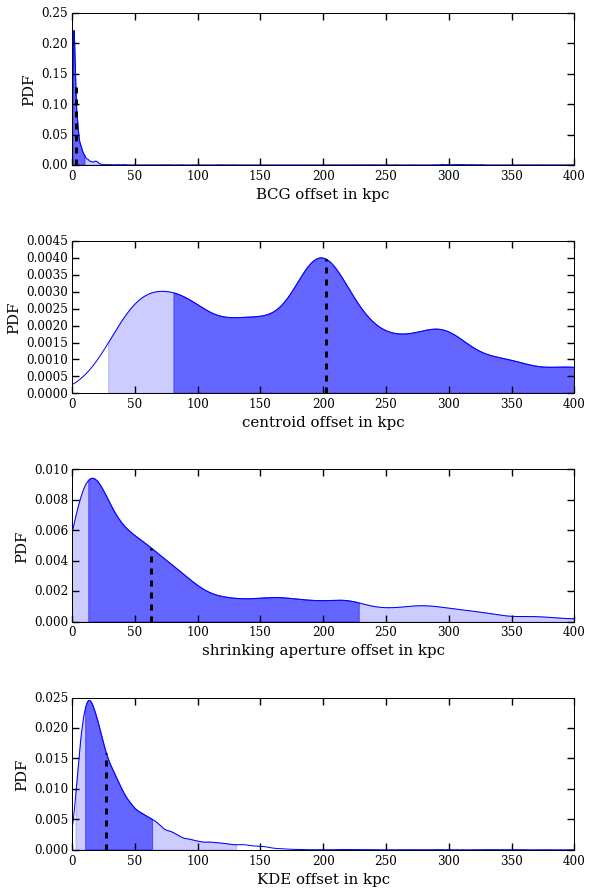

In [193]:
plt.figure(figsize=(18, 15))
gs = gridspec.GridSpec(4, 1)
gs.update(hspace=0.5, wspace=0.3)
gs.set_width_ratios([1., 1.])
# gs.set_height_ratios([1., 1.])

ax_lists = [[plt.subplot(gs[row, col]) for col in range(1)]
            for row in range(4)] 

offset_labels = ['BCG', 'centroid', 'shrinking aperture', 'KDE']
title_on = False
for i, stat in enumerate(['BCG', u'centroid', u'shrink_cent', u'KDE']):
    ax1 = ax_lists[i][0]
    sum_stat1 = plotCI.CI_loc_plot(np.array(dom_peak_df_25[stat]), ax=ax1)
    ax1.set_xlim(0, 400)
  
    ax1.set_ylabel('PDF')
    ax1.set_xlabel(offset_labels[i] + ' offset in kpc')
    if title_on:
        ax1.set_title(stat + 
                 " loc={0:.0f} $\pm$ {1:.0f}, {2:.0f}, {3:.0f}, {4:.0f}".format(
                 sum_stat1['loc'], sum_stat1['low68'], sum_stat1['up68'], 
                 sum_stat1['low95'], sum_stat1['up95'])
                )
    sum_stat_df_list.append(pd.DataFrame(sum_stat1, index=[stat]))
    
plt.savefig('../../paper/figures/finalized/Fig5_offset_distribution.png',
            bbox_inches='tight')

In [141]:
sum_stat_df = pd.concat(sum_stat_df_list)
abs_sum_stat_df = pd.concat(abs_sum_stat_df_list)

# comments 

for final results there will be several tables:
* 

In [151]:
sum_stat_df.to_hdf("../../data/test_sum_stat.h5", "df")

/Users/karenyng/Documents/illustris_analyses/code/IlEnv/lib/python2.7/site-packages/pandas/io/pytables.py:2558: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

  warnings.warn(ws, PerformanceWarning)


In [152]:
abs_sum_stat_df.to_hdf("../../data/test_sum_stat.h5", "abs_df")

In [150]:
sum_stat_df.ix['BCG', 'loc']

-0.92131372826162639

# call the python wrapper to R function 

see if the density estimates differ a lot between the one made by "Silverman's" rule and 
the cross validation 

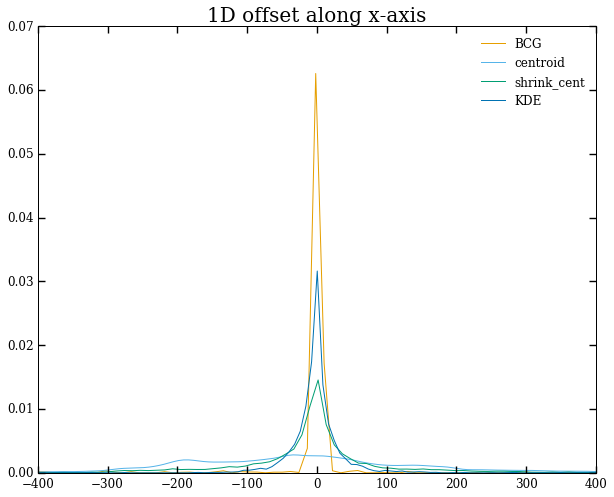

In [196]:
plt.
for stat in ['BCG', u'centroid', u'shrink_cent', u'KDE']:
    
    fhat = get_KDE.do_1D_KDE(np.array(dom_peak_df["Delta_x_" + stat]), 
                             convert_to_py_format=True)
    plt.plot(fhat['eval_points'], fhat['estimate'], label=stat)
   
plt.xlim(-400, 400)
plt.title('1D offset along x-axis')
plt.legend()

In [ ]:
color = {'BCG': 'r',
         'centroid': 'g',
         'shrink_cent': 'b',         
        }

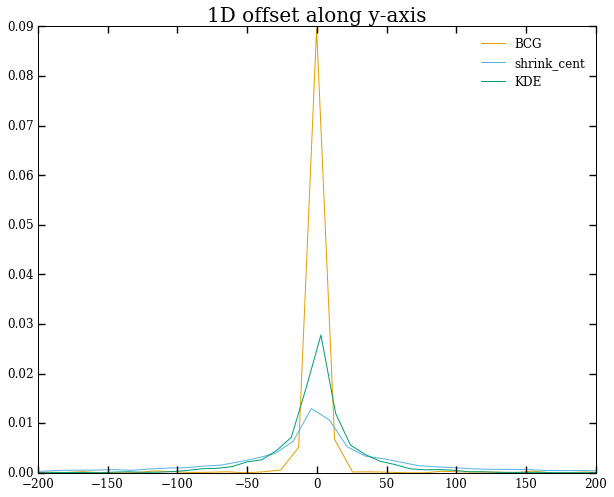

In [202]:
for stat in ['BCG', u'shrink_cent', u'KDE']:
    fhat = get_KDE.do_1D_KDE(np.array(dom_peak_df["Delta_y_" + stat]), 
                             convert_to_py_format=True)
    plt.plot(fhat['eval_points'], fhat['estimate'], label=stat)
   
plt.xlim(-200, 200)
plt.title('1D offset along y-axis')
plt.legend()

# gather the projection independent part of our uber dataframe

In [36]:
uber_df = compDist.construct_uber_result_df(
    star_fhats, DM_fhats, main_FOF_h5
)

In [37]:
uber_df

,clstNo,M200C,richness
0,48,1168.006836,53
1,51,1878.831665,56
2,58,1416.312622,58
